## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
#combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on ="Mouse ID")

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [8]:
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standart Deviation": std_dev,
    "SEM": sem
})

summary_stats_df

,Mean,Median,Variance,Standart Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [77]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_group = combined_data.groupby('Drug Regimen')
regimen_group_count = pd.DataFrame(regimen_group['Drug Regimen'].count())
regimen_group_count = regimen_group_count.rename(columns={"Drug Regimen": "Count"})
regimen_group_count

,Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


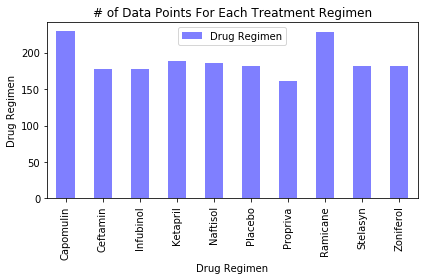

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot 
regimen_chart = regimen_group_count.plot(kind='bar', 
        title="# of Data Points For Each Treatment Regimen", alpha= 0.5, color = "b", align="center")
plt.ylabel("Count")
plt.ylabel("Drug Regimen")
plt.tight_layout()


plt.show()

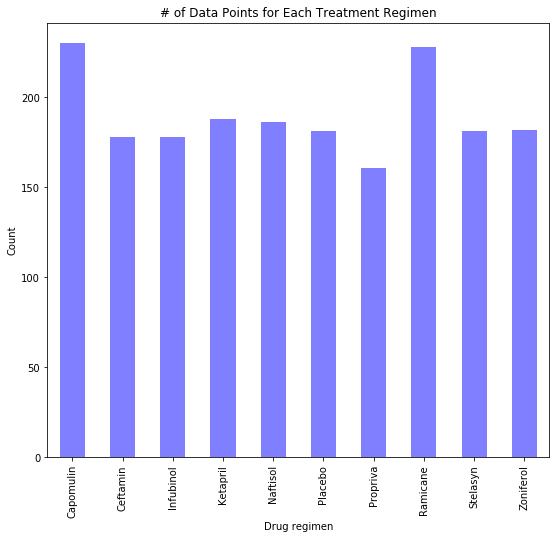

In [13]:
x_axis = np.arange(len(regimen_group_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(9,8))
plt.bar(x_axis, regimen_group_count["Drug Regimen"], color='blue', align="center", width = 0.5, alpha=.5)
plt.xticks(tick_locations, list(regimen_group_count.index), rotation="vertical")

plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(regimen_group_count["Drug Regimen"])*1.05)

plt.title("# of Data Points for Each Treatment Regimen")
plt.xlabel("Drug regimen")
plt.ylabel("Count")

plt.show()

## Pie plots

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_data.groupby('Sex')

gender_group_count = pd.DataFrame(gender_group['Sex'].count())

gender_group_count = gender_group_count.rename(columns={"Sex": "Count"})

gender_group_count.head()


,Count
Sex,
Female,935
Male,958


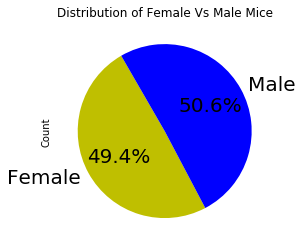

In [41]:
gender_group_count.plot(kind='pie', y='Count', title="Distribution of Female Vs Male Mice",
                       startangle=120, autopct='%1.1f%%', fontsize=20, 
                       legend=False, colors=["Y","Blue"])


Text(0.5, 0, 'Distribution of Female Vs Male Mice')

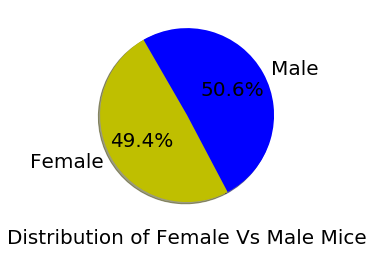

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)

gender_counts = gender_group_count['Count']

plt.pie(gender_counts, labels=genders, colors=["Y","Blue"], autopct='%1.1f%%',
        startangle=120, shadow=True)

plt.rcParams['font.size'] = 15
plt.xlabel("Distribution of Female Vs Male Mice")

## Quartiles, outliers and boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

regimen_group_count
regimen_group_count_sorted = regimen_group_count.sort_values('Count', ascending=False)
regimen_group_count_sorted[:4]

,Count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186


In [92]:
four_drug_list = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol']

four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]

four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [127]:
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(
    Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

four_last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [128]:
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)

four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ketapril,Naftisol,Ramicane
Mouse ID,,,,,
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048
a457,Last_tumor_size,NaN,49.783,NaN,NaN
a520,Last_tumor_size,NaN,NaN,NaN,38.810
a644,Last_tumor_size,NaN,NaN,NaN,32.979


In [104]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

trial = 0

for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if trial == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    trial += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Ketapril IQR data is:
The lower quartile of Ketapril is: 56.72
The upper quartile of Ketapril is: 69.87
The interquartile range of Ketapril is: 13.15
The the median of Ketapril is: 64.49 
Values below 36.99 for Ketapril could be outliers.
Values

In [105]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = []

for drug in four_drug_list:
    box_plot.append(list(four_last_tumor_unstack[drug].dropna()))


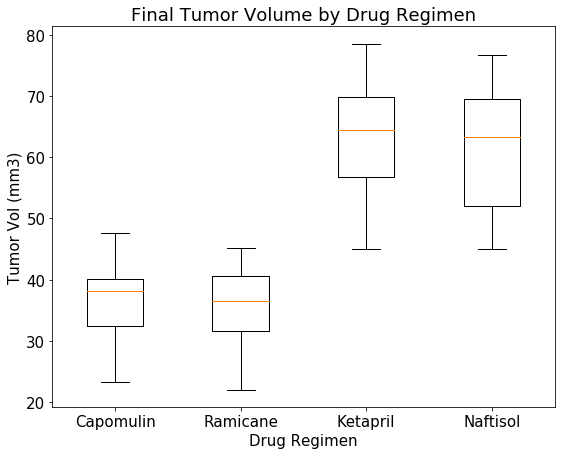

In [115]:
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(box_plot,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_drug_list)

plt.show()

## Line and scatter plots

In [150]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
capomulin_data = capomulin_data.reset_index()
capomulin_data.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [151]:
s185_capomulin = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
s185_capomulin

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0, 0.5, 'Tumor Volume')

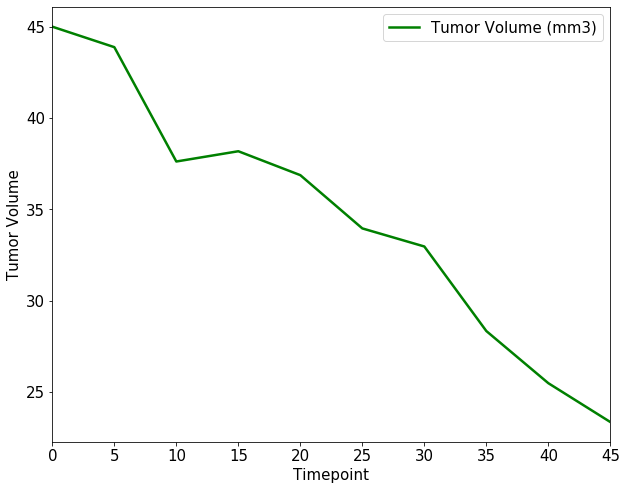

In [160]:
s185_capomulin = s185_capomulin.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

s185_capomulin = s185_capomulin.reset_index(drop=True)

s185_capomulin.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')
plt.ylabel('Tumor Volume')

Text(0, 0.5, 'Tumor Volume')

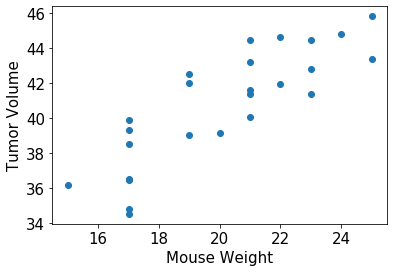

In [161]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = capomulin_data.groupby(capomulin_data["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_data.groupby(capomulin_data["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, tumor_volume)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')

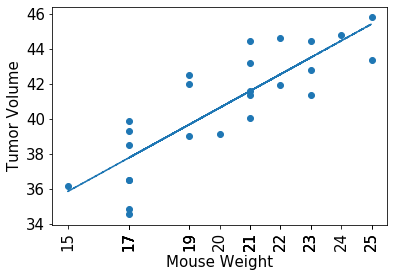

The correlation between weight and tumor value is 0.84


In [170]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope, int, r, o, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int

plt.scatter(mouse_weight, tumor_volume)
plt.ylabel("Tumor Volume")
plt.xlabel("Mouse Weight")
plt.plot(mouse_weight, fit, "--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

correlation = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {correlation}')
